In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [16]:
# laod df RISdata_1990_2000_yearly.csv and RISdata_2010_2020_yearly.csv
df1 = pd.read_csv('RISdata_1990_2000_yearly.csv')
df2 = pd.read_csv('RISdata_2010_2020_yearly.csv')

# Add period labels for comparison
df1['Period'] = '1990-2000'
df2['Period'] = '2010-2020'

In [17]:
df_combined = pd.concat([df1, df2], ignore_index=True)


In [23]:
df_combined.head()

,#,Trap,Insect,Year,Total,Trap Operating Days,Period
0,1,Rothamsted,Metopolophium dirhodum,1990,579,365,1990-2000
1,2,Rothamsted,Metopolophium dirhodum,1991,415,365,1990-2000
2,3,Rothamsted,Metopolophium dirhodum,1992,4775,366,1990-2000
3,4,Rothamsted,Metopolophium dirhodum,1993,381,365,1990-2000
4,5,Rothamsted,Metopolophium dirhodum,1994,2583,365,1990-2000


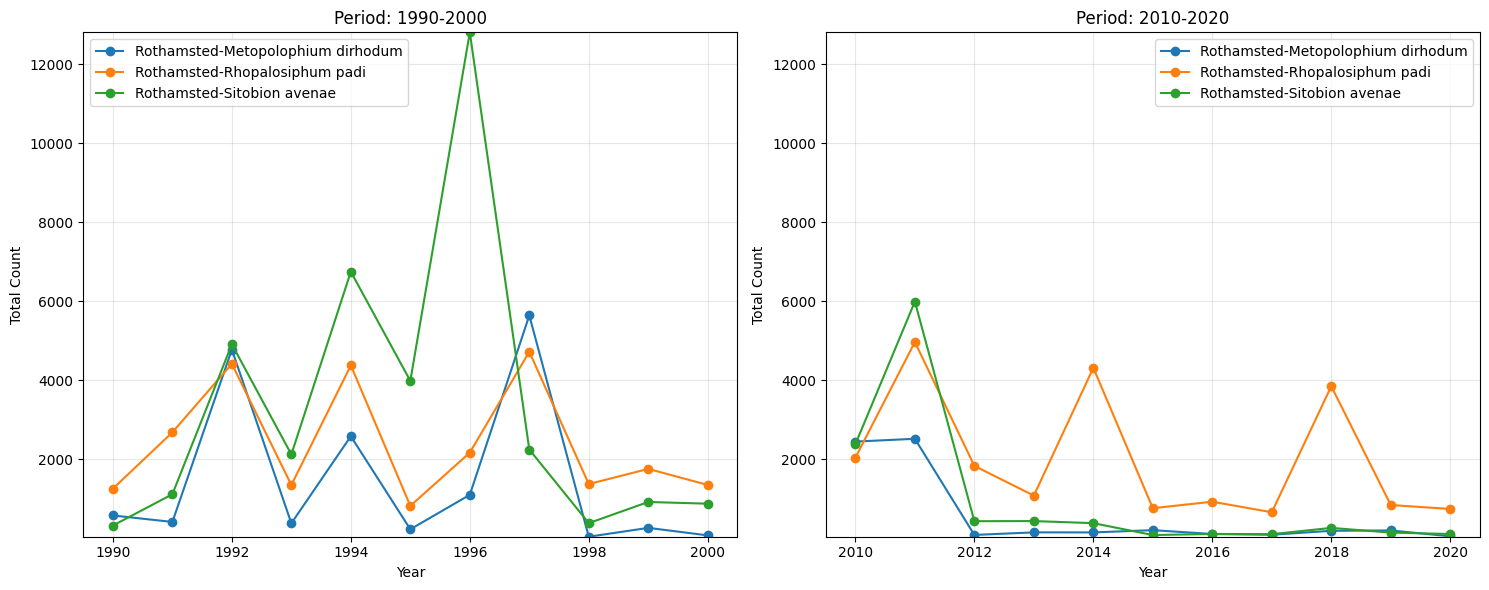

In [26]:
def plot_by_period(df):
    periods = df['Period'].unique()
    
    # Get global y-axis limits
    y_min = df['Total'].min()
    y_max = df['Total'].max()
    
    fig, axes = plt.subplots(1, len(periods), figsize=(15, 6))
    
    for i, period in enumerate(periods):
        period_data = df[df['Period'] == period]
        
        for trap in period_data['Trap'].unique():
            for insect in period_data['Insect'].unique():
                data = period_data[(period_data['Trap'] == trap) & (period_data['Insect'] == insect)]
                axes[i].plot(data['Year'], data['Total'], marker='o', label=f'{trap}-{insect}')
        
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('Total Count')
        axes[i].set_title(f'Period: {period}')
        axes[i].set_ylim(y_min, y_max)
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_by_period(df_combined)